In [13]:
### Feature Extractor ###

# Import the functions to calculate feature descriptors
from skimage.feature import hog
from skimage.io import imread
import joblib
from skimage.transform import resize
import cv2
# To read file names
import glob
import os

import matplotlib.pyplot as plt

def convert_to_gray(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    return gray

if __name__ == "__main__":
    
    orientations = 9
    pixels_per_cell = (8, 8)
    cells_per_block = (2, 2)
    pos_im_path = "dataset/train/positives"
    neg_im_path = "dataset/train/negatives"
    pos_feat_ph = ("output/positives_features")
    neg_feat_ph = ("output/negatives_features")
        
    #"Calculating the descriptors for the positive samples and saving them"
    for im_path in glob.glob(os.path.join(pos_im_path, "*")):
        im = imread(im_path)
        im = convert_to_gray(im)
        im_resized = resize(im, (64,64))
        fd = hog(im_resized, orientations, pixels_per_cell, cells_per_block)
        fd_name = os.path.split(im_path)[1].split(".")[0] + ".feat"
        fd_path = os.path.join(pos_feat_ph, fd_name)
        joblib.dump(fd, fd_path)
    print ("Positive features saved in {}".format(pos_feat_ph))

    #"Calculating the descriptors for the negative samples and saving them"
    for im_path in glob.glob(os.path.join(neg_im_path, "*")):
        im = imread(im_path)
        im = convert_to_gray(im)
        im_resized = resize(im, (64,64))
        fd = hog(im_resized, orientations, pixels_per_cell, cells_per_block)
        fd_name = os.path.split(im_path)[1].split(".")[0] + ".feat"
        fd_path = os.path.join(neg_feat_ph, fd_name)
        joblib.dump(fd, fd_path)
    print("Negative features saved in {}".format(neg_feat_ph))

Positive features saved in output/positives_features
Negative features saved in output/negatives_features


In [14]:
### Training the classifier (SVM) ###

# Import the functions to calculate feature descriptors
from skimage.feature import hog
from sklearn.svm import LinearSVC
import joblib
import cv2
# To read file names
import glob
import os

if __name__ == "__main__":

    model_path = "output/models"
    pos_feat_path = "output/positives_features"
    neg_feat_path = "output/negatives_features"

    fds = []
    labels = []
    
    # Load the positive features
    for feat_path in glob.glob(os.path.join(pos_feat_path,"*.feat")):
        fd = joblib.load(feat_path)
        fds.append(fd)
        labels.append(1)

    # Load the negative features
    for feat_path in glob.glob(os.path.join(neg_feat_path,"*.feat")):
        fd = joblib.load(feat_path)
        fds.append(fd)
        labels.append(0)

    #"Training a Linear SVM Classifier"
    clf = LinearSVC()
    clf.fit(fds, labels)
    
    model_path = os.path.join("output/models", 'model.pkl')
    joblib.dump(clf, model_path)    
        # Print information about the model
    print("Number of features:", clf.coef_.shape[1])
    print("Coefficients shape:", clf.coef_.shape)
    print("Intercept shape:", clf.intercept_.shape)

    
    print ("Classifier saved")

Number of features: 1764
Coefficients shape: (1, 1764)
Intercept shape: (1,)
Classifier saved


D:\Programs\Anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Width: 416, Height: 416, Channels: 3
Image Size (scaled): (416, 416, 3)
Window Size: (64, 64, 3)
Detection:: Location -> (0, 0)
Scale ->  0 | Confidence Score [0.05291901] 

Image Size (scaled): (416, 416, 3)
Window Size: (64, 64, 3)
Detection:: Location -> (10, 0)
Scale ->  0 | Confidence Score [0.05291901] 

Image Size (scaled): (416, 416, 3)
Window Size: (64, 64, 3)
Detection:: Location -> (20, 0)
Scale ->  0 | Confidence Score [0.05291901] 

Image Size (scaled): (416, 416, 3)
Window Size: (64, 64, 3)
Detection:: Location -> (30, 0)
Scale ->  0 | Confidence Score [0.05291901] 

Image Size (scaled): (416, 416, 3)
Window Size: (64, 64, 3)
Detection:: Location -> (40, 0)
Scale ->  0 | Confidence Score [0.05291901] 

Image Size (scaled): (416, 416, 3)
Window Size: (64, 64, 3)
Detection:: Location -> (50, 0)
Scale ->  0 | Confidence Score [0.05291901] 

Image Size (scaled): (416, 416, 3)
Window Size: (64, 64, 3)
Detection:: Location -> (60, 0)
Scale ->  0 | Confidence Score [0.05291901] 

Detection:: Location -> (290, 20)
Scale ->  0 | Confidence Score [0.05291901] 

Image Size (scaled): (416, 416, 3)
Window Size: (64, 64, 3)
Detection:: Location -> (300, 20)
Scale ->  0 | Confidence Score [0.05291901] 

Image Size (scaled): (416, 416, 3)
Window Size: (64, 64, 3)
Detection:: Location -> (310, 20)
Scale ->  0 | Confidence Score [0.05291901] 

Image Size (scaled): (416, 416, 3)
Window Size: (64, 64, 3)
Detection:: Location -> (320, 20)
Scale ->  0 | Confidence Score [0.05291901] 

Image Size (scaled): (416, 416, 3)
Window Size: (64, 64, 3)
Detection:: Location -> (330, 20)
Scale ->  0 | Confidence Score [0.05291901] 

Image Size (scaled): (416, 416, 3)
Window Size: (64, 64, 3)
Detection:: Location -> (340, 20)
Scale ->  0 | Confidence Score [0.05291901] 

Image Size (scaled): (416, 416, 3)
Window Size: (64, 64, 3)
Detection:: Location -> (350, 20)
Scale ->  0 | Confidence Score [0.05291901] 

Image Size (scaled): (416, 416, 3)
Window Size: (64, 64, 3)
Detection:: Location

Detection:: Location -> (290, 40)
Scale ->  0 | Confidence Score [0.05291901] 

Image Size (scaled): (416, 416, 3)
Window Size: (64, 64, 3)
Detection:: Location -> (300, 40)
Scale ->  0 | Confidence Score [0.05291901] 

Image Size (scaled): (416, 416, 3)
Window Size: (64, 64, 3)
Detection:: Location -> (310, 40)
Scale ->  0 | Confidence Score [0.05291901] 

Image Size (scaled): (416, 416, 3)
Window Size: (64, 64, 3)
Detection:: Location -> (320, 40)
Scale ->  0 | Confidence Score [0.05291901] 

Image Size (scaled): (416, 416, 3)
Window Size: (64, 64, 3)
Detection:: Location -> (330, 40)
Scale ->  0 | Confidence Score [0.05291901] 

Image Size (scaled): (416, 416, 3)
Window Size: (64, 64, 3)
Detection:: Location -> (340, 40)
Scale ->  0 | Confidence Score [0.05291901] 

Image Size (scaled): (416, 416, 3)
Window Size: (64, 64, 3)
Detection:: Location -> (350, 40)
Scale ->  0 | Confidence Score [0.05291901] 

Image Size (scaled): (416, 416, 3)
Window Size: (64, 64, 3)
Detection:: Location

Detection:: Location -> (240, 70)
Scale ->  0 | Confidence Score [0.09656222] 

Image Size (scaled): (416, 416, 3)
Window Size: (64, 64, 3)
Detection:: Location -> (250, 70)
Scale ->  0 | Confidence Score [0.15989835] 

Image Size (scaled): (416, 416, 3)
Window Size: (64, 64, 3)
Detection:: Location -> (260, 70)
Scale ->  0 | Confidence Score [0.19627727] 

Image Size (scaled): (416, 416, 3)
Window Size: (64, 64, 3)
Detection:: Location -> (270, 70)
Scale ->  0 | Confidence Score [0.19040089] 

Image Size (scaled): (416, 416, 3)
Window Size: (64, 64, 3)
Detection:: Location -> (280, 70)
Scale ->  0 | Confidence Score [0.26520179] 

Image Size (scaled): (416, 416, 3)
Window Size: (64, 64, 3)
Detection:: Location -> (290, 70)
Scale ->  0 | Confidence Score [0.25056139] 

Image Size (scaled): (416, 416, 3)
Window Size: (64, 64, 3)
Detection:: Location -> (300, 70)
Scale ->  0 | Confidence Score [0.17928693] 

Image Size (scaled): (416, 416, 3)
Window Size: (64, 64, 3)
Detection:: Location

Detection:: Location -> (340, 90)
Scale ->  0 | Confidence Score [0.05291901] 

Image Size (scaled): (416, 416, 3)
Window Size: (64, 64, 3)
Detection:: Location -> (350, 90)
Scale ->  0 | Confidence Score [0.05291901] 

Image Size (scaled): (416, 416, 3)
Window Size: (64, 64, 3)
Detection:: Location -> (0, 100)
Scale ->  0 | Confidence Score [0.05291901] 

Image Size (scaled): (416, 416, 3)
Window Size: (64, 64, 3)
Detection:: Location -> (10, 100)
Scale ->  0 | Confidence Score [0.05291901] 

Image Size (scaled): (416, 416, 3)
Window Size: (64, 64, 3)
Detection:: Location -> (20, 100)
Scale ->  0 | Confidence Score [0.05291901] 

Image Size (scaled): (416, 416, 3)
Window Size: (64, 64, 3)
Detection:: Location -> (30, 100)
Scale ->  0 | Confidence Score [0.05291901] 

Image Size (scaled): (416, 416, 3)
Window Size: (64, 64, 3)
Detection:: Location -> (40, 100)
Scale ->  0 | Confidence Score [0.05291901] 

Image Size (scaled): (416, 416, 3)
Window Size: (64, 64, 3)
Detection:: Location 

Image Size (scaled): (416, 416, 3)
Window Size: (64, 64, 3)
Detection:: Location -> (80, 120)
Scale ->  0 | Confidence Score [0.18079181] 

Image Size (scaled): (416, 416, 3)
Window Size: (64, 64, 3)
Detection:: Location -> (90, 120)
Scale ->  0 | Confidence Score [0.52600002] 

Image Size (scaled): (416, 416, 3)
Window Size: (64, 64, 3)
Detection:: Location -> (100, 120)
Scale ->  0 | Confidence Score [0.41796121] 

Image Size (scaled): (416, 416, 3)
Window Size: (64, 64, 3)
Detection:: Location -> (110, 120)
Scale ->  0 | Confidence Score [0.69909799] 

Image Size (scaled): (416, 416, 3)
Window Size: (64, 64, 3)
Detection:: Location -> (120, 120)
Scale ->  0 | Confidence Score [0.23970904] 

Image Size (scaled): (416, 416, 3)
Window Size: (64, 64, 3)
Image Size (scaled): (416, 416, 3)
Window Size: (64, 64, 3)
Image Size (scaled): (416, 416, 3)
Window Size: (64, 64, 3)
Detection:: Location -> (150, 120)
Scale ->  0 | Confidence Score [0.08490322] 

Image Size (scaled): (416, 416, 3)
W

Detection:: Location -> (330, 140)
Scale ->  0 | Confidence Score [0.05671051] 

Image Size (scaled): (416, 416, 3)
Window Size: (64, 64, 3)
Detection:: Location -> (340, 140)
Scale ->  0 | Confidence Score [0.05291901] 

Image Size (scaled): (416, 416, 3)
Window Size: (64, 64, 3)
Detection:: Location -> (350, 140)
Scale ->  0 | Confidence Score [0.05291901] 

Image Size (scaled): (416, 416, 3)
Window Size: (64, 64, 3)
Detection:: Location -> (0, 150)
Scale ->  0 | Confidence Score [0.05291901] 

Image Size (scaled): (416, 416, 3)
Window Size: (64, 64, 3)
Detection:: Location -> (10, 150)
Scale ->  0 | Confidence Score [0.05291901] 

Image Size (scaled): (416, 416, 3)
Window Size: (64, 64, 3)
Detection:: Location -> (20, 150)
Scale ->  0 | Confidence Score [0.05291901] 

Image Size (scaled): (416, 416, 3)
Window Size: (64, 64, 3)
Detection:: Location -> (30, 150)
Scale ->  0 | Confidence Score [0.05291901] 

Image Size (scaled): (416, 416, 3)
Window Size: (64, 64, 3)
Detection:: Locati

Detection:: Location -> (120, 170)
Scale ->  0 | Confidence Score [0.51321646] 

Image Size (scaled): (416, 416, 3)
Window Size: (64, 64, 3)
Detection:: Location -> (130, 170)
Scale ->  0 | Confidence Score [0.55727548] 

Image Size (scaled): (416, 416, 3)
Window Size: (64, 64, 3)
Detection:: Location -> (140, 170)
Scale ->  0 | Confidence Score [0.34523362] 

Image Size (scaled): (416, 416, 3)
Window Size: (64, 64, 3)
Image Size (scaled): (416, 416, 3)
Window Size: (64, 64, 3)
Detection:: Location -> (160, 170)
Scale ->  0 | Confidence Score [0.01339275] 

Image Size (scaled): (416, 416, 3)
Window Size: (64, 64, 3)
Detection:: Location -> (170, 170)
Scale ->  0 | Confidence Score [0.40353085] 

Image Size (scaled): (416, 416, 3)
Window Size: (64, 64, 3)
Image Size (scaled): (416, 416, 3)
Window Size: (64, 64, 3)
Detection:: Location -> (190, 170)
Scale ->  0 | Confidence Score [0.2085424] 

Image Size (scaled): (416, 416, 3)
Window Size: (64, 64, 3)
Detection:: Location -> (200, 170)


Image Size (scaled): (416, 416, 3)
Window Size: (64, 64, 3)
Detection:: Location -> (320, 190)
Scale ->  0 | Confidence Score [0.06775028] 

Image Size (scaled): (416, 416, 3)
Window Size: (64, 64, 3)
Detection:: Location -> (330, 190)
Scale ->  0 | Confidence Score [0.1234104] 

Image Size (scaled): (416, 416, 3)
Window Size: (64, 64, 3)
Detection:: Location -> (340, 190)
Scale ->  0 | Confidence Score [0.05291901] 

Image Size (scaled): (416, 416, 3)
Window Size: (64, 64, 3)
Detection:: Location -> (350, 190)
Scale ->  0 | Confidence Score [0.05291901] 

Image Size (scaled): (416, 416, 3)
Window Size: (64, 64, 3)
Detection:: Location -> (0, 200)
Scale ->  0 | Confidence Score [0.05291901] 

Image Size (scaled): (416, 416, 3)
Window Size: (64, 64, 3)
Detection:: Location -> (10, 200)
Scale ->  0 | Confidence Score [0.05291901] 

Image Size (scaled): (416, 416, 3)
Window Size: (64, 64, 3)
Detection:: Location -> (20, 200)
Scale ->  0 | Confidence Score [0.05291901] 

Image Size (scaled

Detection:: Location -> (100, 220)
Scale ->  0 | Confidence Score [0.13838738] 

Image Size (scaled): (416, 416, 3)
Window Size: (64, 64, 3)
Detection:: Location -> (110, 220)
Scale ->  0 | Confidence Score [0.15562437] 

Image Size (scaled): (416, 416, 3)
Window Size: (64, 64, 3)
Detection:: Location -> (120, 220)
Scale ->  0 | Confidence Score [0.0626771] 

Image Size (scaled): (416, 416, 3)
Window Size: (64, 64, 3)
Image Size (scaled): (416, 416, 3)
Window Size: (64, 64, 3)
Image Size (scaled): (416, 416, 3)
Window Size: (64, 64, 3)
Image Size (scaled): (416, 416, 3)
Window Size: (64, 64, 3)
Image Size (scaled): (416, 416, 3)
Window Size: (64, 64, 3)
Image Size (scaled): (416, 416, 3)
Window Size: (64, 64, 3)
Image Size (scaled): (416, 416, 3)
Window Size: (64, 64, 3)
Detection:: Location -> (190, 220)
Scale ->  0 | Confidence Score [0.04093101] 

Image Size (scaled): (416, 416, 3)
Window Size: (64, 64, 3)
Detection:: Location -> (200, 220)
Scale ->  0 | Confidence Score [0.11212695

Detection:: Location -> (240, 240)
Scale ->  0 | Confidence Score [0.03963712] 

Image Size (scaled): (416, 416, 3)
Window Size: (64, 64, 3)
Detection:: Location -> (250, 240)
Scale ->  0 | Confidence Score [0.21643104] 

Image Size (scaled): (416, 416, 3)
Window Size: (64, 64, 3)
Image Size (scaled): (416, 416, 3)
Window Size: (64, 64, 3)
Image Size (scaled): (416, 416, 3)
Window Size: (64, 64, 3)
Detection:: Location -> (280, 240)
Scale ->  0 | Confidence Score [0.11538594] 

Image Size (scaled): (416, 416, 3)
Window Size: (64, 64, 3)
Detection:: Location -> (290, 240)
Scale ->  0 | Confidence Score [0.05948066] 

Image Size (scaled): (416, 416, 3)
Window Size: (64, 64, 3)
Image Size (scaled): (416, 416, 3)
Window Size: (64, 64, 3)
Detection:: Location -> (310, 240)
Scale ->  0 | Confidence Score [0.04325421] 

Image Size (scaled): (416, 416, 3)
Window Size: (64, 64, 3)
Detection:: Location -> (320, 240)
Scale ->  0 | Confidence Score [0.15347067] 

Image Size (scaled): (416, 416, 3)

Detection:: Location -> (100, 270)
Scale ->  0 | Confidence Score [0.23569966] 

Image Size (scaled): (416, 416, 3)
Window Size: (64, 64, 3)
Detection:: Location -> (110, 270)
Scale ->  0 | Confidence Score [0.6398623] 

Image Size (scaled): (416, 416, 3)
Window Size: (64, 64, 3)
Image Size (scaled): (416, 416, 3)
Window Size: (64, 64, 3)
Detection:: Location -> (130, 270)
Scale ->  0 | Confidence Score [0.02271747] 

Image Size (scaled): (416, 416, 3)
Window Size: (64, 64, 3)
Detection:: Location -> (140, 270)
Scale ->  0 | Confidence Score [0.04122128] 

Image Size (scaled): (416, 416, 3)
Window Size: (64, 64, 3)
Detection:: Location -> (150, 270)
Scale ->  0 | Confidence Score [0.32358758] 

Image Size (scaled): (416, 416, 3)
Window Size: (64, 64, 3)
Detection:: Location -> (160, 270)
Scale ->  0 | Confidence Score [0.28776298] 

Image Size (scaled): (416, 416, 3)
Window Size: (64, 64, 3)
Detection:: Location -> (170, 270)
Scale ->  0 | Confidence Score [0.5113115] 

Image Size (sca

Image Size (scaled): (416, 416, 3)
Window Size: (64, 64, 3)
Detection:: Location -> (250, 290)
Scale ->  0 | Confidence Score [0.05444023] 

Image Size (scaled): (416, 416, 3)
Window Size: (64, 64, 3)
Detection:: Location -> (260, 290)
Scale ->  0 | Confidence Score [0.02826902] 

Image Size (scaled): (416, 416, 3)
Window Size: (64, 64, 3)
Detection:: Location -> (270, 290)
Scale ->  0 | Confidence Score [0.17695107] 

Image Size (scaled): (416, 416, 3)
Window Size: (64, 64, 3)
Image Size (scaled): (416, 416, 3)
Window Size: (64, 64, 3)
Image Size (scaled): (416, 416, 3)
Window Size: (64, 64, 3)
Detection:: Location -> (300, 290)
Scale ->  0 | Confidence Score [0.00097207] 

Image Size (scaled): (416, 416, 3)
Window Size: (64, 64, 3)
Detection:: Location -> (310, 290)
Scale ->  0 | Confidence Score [0.1314466] 

Image Size (scaled): (416, 416, 3)
Window Size: (64, 64, 3)
Detection:: Location -> (320, 290)
Scale ->  0 | Confidence Score [0.05291901] 

Image Size (scaled): (416, 416, 3)


Image Size (scaled): (416, 416, 3)
Window Size: (64, 64, 3)
Image Size (scaled): (416, 416, 3)
Window Size: (64, 64, 3)
Detection:: Location -> (160, 320)
Scale ->  0 | Confidence Score [0.08586227] 

Image Size (scaled): (416, 416, 3)
Window Size: (64, 64, 3)
Detection:: Location -> (170, 320)
Scale ->  0 | Confidence Score [0.25386914] 

Image Size (scaled): (416, 416, 3)
Window Size: (64, 64, 3)
Detection:: Location -> (180, 320)
Scale ->  0 | Confidence Score [0.42358901] 

Image Size (scaled): (416, 416, 3)
Window Size: (64, 64, 3)
Image Size (scaled): (416, 416, 3)
Window Size: (64, 64, 3)
Image Size (scaled): (416, 416, 3)
Window Size: (64, 64, 3)
Detection:: Location -> (210, 320)
Scale ->  0 | Confidence Score [0.01407823] 

Image Size (scaled): (416, 416, 3)
Window Size: (64, 64, 3)
Detection:: Location -> (220, 320)
Scale ->  0 | Confidence Score [0.1010192] 

Image Size (scaled): (416, 416, 3)
Window Size: (64, 64, 3)
Detection:: Location -> (230, 320)
Scale ->  0 | Confide

Image Size (scaled): (416, 416, 3)
Window Size: (64, 64, 3)
Detection:: Location -> (130, 350)
Scale ->  0 | Confidence Score [0.07759295] 

Image Size (scaled): (416, 416, 3)
Window Size: (64, 64, 3)
Detection:: Location -> (140, 350)
Scale ->  0 | Confidence Score [0.0140421] 

Image Size (scaled): (416, 416, 3)
Window Size: (64, 64, 3)
Detection:: Location -> (150, 350)
Scale ->  0 | Confidence Score [0.09024076] 

Image Size (scaled): (416, 416, 3)
Window Size: (64, 64, 3)
Detection:: Location -> (160, 350)
Scale ->  0 | Confidence Score [0.09273247] 

Image Size (scaled): (416, 416, 3)
Window Size: (64, 64, 3)
Detection:: Location -> (170, 350)
Scale ->  0 | Confidence Score [0.18509699] 

Image Size (scaled): (416, 416, 3)
Window Size: (64, 64, 3)
Image Size (scaled): (416, 416, 3)
Window Size: (64, 64, 3)
Image Size (scaled): (416, 416, 3)
Window Size: (64, 64, 3)
Detection:: Location -> (200, 350)
Scale ->  0 | Confidence Score [0.08076765] 

Image Size (scaled): (416, 416, 3)


Detection:: Location -> (60, 20)
Scale ->  1 | Confidence Score [0.05291901] 

Image Size (scaled): (333, 333, 3)
Window Size: (64, 64, 3)
Detection:: Location -> (70, 20)
Scale ->  1 | Confidence Score [0.05291901] 

Image Size (scaled): (333, 333, 3)
Window Size: (64, 64, 3)
Detection:: Location -> (80, 20)
Scale ->  1 | Confidence Score [0.05291901] 

Image Size (scaled): (333, 333, 3)
Window Size: (64, 64, 3)
Detection:: Location -> (90, 20)
Scale ->  1 | Confidence Score [0.05291901] 

Image Size (scaled): (333, 333, 3)
Window Size: (64, 64, 3)
Detection:: Location -> (100, 20)
Scale ->  1 | Confidence Score [0.05291901] 

Image Size (scaled): (333, 333, 3)
Window Size: (64, 64, 3)
Detection:: Location -> (110, 20)
Scale ->  1 | Confidence Score [0.05291901] 

Image Size (scaled): (333, 333, 3)
Window Size: (64, 64, 3)
Detection:: Location -> (120, 20)
Scale ->  1 | Confidence Score [0.05291901] 

Image Size (scaled): (333, 333, 3)
Window Size: (64, 64, 3)
Detection:: Location -> 

Image Size (scaled): (333, 333, 3)
Window Size: (64, 64, 3)
Detection:: Location -> (140, 50)
Scale ->  1 | Confidence Score [0.14138664] 

Image Size (scaled): (333, 333, 3)
Window Size: (64, 64, 3)
Detection:: Location -> (150, 50)
Scale ->  1 | Confidence Score [0.17904679] 

Image Size (scaled): (333, 333, 3)
Window Size: (64, 64, 3)
Detection:: Location -> (160, 50)
Scale ->  1 | Confidence Score [0.12351522] 

Image Size (scaled): (333, 333, 3)
Window Size: (64, 64, 3)
Detection:: Location -> (170, 50)
Scale ->  1 | Confidence Score [0.14015516] 

Image Size (scaled): (333, 333, 3)
Window Size: (64, 64, 3)
Detection:: Location -> (180, 50)
Scale ->  1 | Confidence Score [0.18119571] 

Image Size (scaled): (333, 333, 3)
Window Size: (64, 64, 3)
Detection:: Location -> (190, 50)
Scale ->  1 | Confidence Score [0.24135729] 

Image Size (scaled): (333, 333, 3)
Window Size: (64, 64, 3)
Detection:: Location -> (200, 50)
Scale ->  1 | Confidence Score [0.27928391] 

Image Size (scaled):

Detection:: Location -> (150, 80)
Scale ->  1 | Confidence Score [0.14289815] 

Image Size (scaled): (333, 333, 3)
Window Size: (64, 64, 3)
Image Size (scaled): (333, 333, 3)
Window Size: (64, 64, 3)
Detection:: Location -> (170, 80)
Scale ->  1 | Confidence Score [0.14075576] 

Image Size (scaled): (333, 333, 3)
Window Size: (64, 64, 3)
Image Size (scaled): (333, 333, 3)
Window Size: (64, 64, 3)
Image Size (scaled): (333, 333, 3)
Window Size: (64, 64, 3)
Detection:: Location -> (200, 80)
Scale ->  1 | Confidence Score [0.27383982] 

Image Size (scaled): (333, 333, 3)
Window Size: (64, 64, 3)
Detection:: Location -> (210, 80)
Scale ->  1 | Confidence Score [0.20478502] 

Image Size (scaled): (333, 333, 3)
Window Size: (64, 64, 3)
Image Size (scaled): (333, 333, 3)
Window Size: (64, 64, 3)
Detection:: Location -> (230, 80)
Scale ->  1 | Confidence Score [0.23933682] 

Image Size (scaled): (333, 333, 3)
Window Size: (64, 64, 3)
Detection:: Location -> (240, 80)
Scale ->  1 | Confidence S

Detection:: Location -> (60, 120)
Scale ->  1 | Confidence Score [0.21316298] 

Image Size (scaled): (333, 333, 3)
Window Size: (64, 64, 3)
Detection:: Location -> (70, 120)
Scale ->  1 | Confidence Score [0.09782954] 

Image Size (scaled): (333, 333, 3)
Window Size: (64, 64, 3)
Image Size (scaled): (333, 333, 3)
Window Size: (64, 64, 3)
Detection:: Location -> (90, 120)
Scale ->  1 | Confidence Score [0.08278652] 

Image Size (scaled): (333, 333, 3)
Window Size: (64, 64, 3)
Image Size (scaled): (333, 333, 3)
Window Size: (64, 64, 3)
Image Size (scaled): (333, 333, 3)
Window Size: (64, 64, 3)
Image Size (scaled): (333, 333, 3)
Window Size: (64, 64, 3)
Detection:: Location -> (130, 120)
Scale ->  1 | Confidence Score [0.05045924] 

Image Size (scaled): (333, 333, 3)
Window Size: (64, 64, 3)
Detection:: Location -> (140, 120)
Scale ->  1 | Confidence Score [0.09828661] 

Image Size (scaled): (333, 333, 3)
Window Size: (64, 64, 3)
Image Size (scaled): (333, 333, 3)
Window Size: (64, 64, 3

Detection:: Location -> (20, 160)
Scale ->  1 | Confidence Score [0.05291901] 

Image Size (scaled): (333, 333, 3)
Window Size: (64, 64, 3)
Detection:: Location -> (30, 160)
Scale ->  1 | Confidence Score [0.17310821] 

Image Size (scaled): (333, 333, 3)
Window Size: (64, 64, 3)
Image Size (scaled): (333, 333, 3)
Window Size: (64, 64, 3)
Image Size (scaled): (333, 333, 3)
Window Size: (64, 64, 3)
Detection:: Location -> (60, 160)
Scale ->  1 | Confidence Score [0.08696608] 

Image Size (scaled): (333, 333, 3)
Window Size: (64, 64, 3)
Detection:: Location -> (70, 160)
Scale ->  1 | Confidence Score [0.21225161] 

Image Size (scaled): (333, 333, 3)
Window Size: (64, 64, 3)
Image Size (scaled): (333, 333, 3)
Window Size: (64, 64, 3)
Detection:: Location -> (90, 160)
Scale ->  1 | Confidence Score [0.18463734] 

Image Size (scaled): (333, 333, 3)
Window Size: (64, 64, 3)
Detection:: Location -> (100, 160)
Scale ->  1 | Confidence Score [0.03454186] 

Image Size (scaled): (333, 333, 3)
Wind

Image Size (scaled): (333, 333, 3)
Window Size: (64, 64, 3)
Detection:: Location -> (220, 190)
Scale ->  1 | Confidence Score [0.16445746] 

Image Size (scaled): (333, 333, 3)
Window Size: (64, 64, 3)
Detection:: Location -> (230, 190)
Scale ->  1 | Confidence Score [0.16384994] 

Image Size (scaled): (333, 333, 3)
Window Size: (64, 64, 3)
Image Size (scaled): (333, 333, 3)
Window Size: (64, 64, 3)
Detection:: Location -> (250, 190)
Scale ->  1 | Confidence Score [0.12206444] 

Image Size (scaled): (333, 333, 3)
Window Size: (64, 64, 3)
Detection:: Location -> (260, 190)
Scale ->  1 | Confidence Score [0.05291901] 

Image Size (scaled): (333, 333, 3)
Window Size: (64, 64, 3)
Detection:: Location -> (0, 200)
Scale ->  1 | Confidence Score [0.05458695] 

Image Size (scaled): (333, 333, 3)
Window Size: (64, 64, 3)
Image Size (scaled): (333, 333, 3)
Window Size: (64, 64, 3)
Detection:: Location -> (20, 200)
Scale ->  1 | Confidence Score [0.03842299] 

Image Size (scaled): (333, 333, 3)
Wi

Detection:: Location -> (140, 230)
Scale ->  1 | Confidence Score [0.36149125] 

Image Size (scaled): (333, 333, 3)
Window Size: (64, 64, 3)
Detection:: Location -> (150, 230)
Scale ->  1 | Confidence Score [0.01233256] 

Image Size (scaled): (333, 333, 3)
Window Size: (64, 64, 3)
Detection:: Location -> (160, 230)
Scale ->  1 | Confidence Score [0.31855885] 

Image Size (scaled): (333, 333, 3)
Window Size: (64, 64, 3)
Image Size (scaled): (333, 333, 3)
Window Size: (64, 64, 3)
Image Size (scaled): (333, 333, 3)
Window Size: (64, 64, 3)
Detection:: Location -> (190, 230)
Scale ->  1 | Confidence Score [0.08613302] 

Image Size (scaled): (333, 333, 3)
Window Size: (64, 64, 3)
Detection:: Location -> (200, 230)
Scale ->  1 | Confidence Score [0.13107231] 

Image Size (scaled): (333, 333, 3)
Window Size: (64, 64, 3)
Detection:: Location -> (210, 230)
Scale ->  1 | Confidence Score [0.04118513] 

Image Size (scaled): (333, 333, 3)
Window Size: (64, 64, 3)
Image Size (scaled): (333, 333, 3)

Image Size (scaled): (267, 267, 3)
Window Size: (64, 64, 3)
Detection:: Location -> (0, 0)
Scale ->  2 | Confidence Score [0.05291901] 

Image Size (scaled): (267, 267, 3)
Window Size: (64, 64, 3)
Detection:: Location -> (10, 0)
Scale ->  2 | Confidence Score [0.05291901] 

Image Size (scaled): (267, 267, 3)
Window Size: (64, 64, 3)
Detection:: Location -> (20, 0)
Scale ->  2 | Confidence Score [0.05291901] 

Image Size (scaled): (267, 267, 3)
Window Size: (64, 64, 3)
Detection:: Location -> (30, 0)
Scale ->  2 | Confidence Score [0.05291901] 

Image Size (scaled): (267, 267, 3)
Window Size: (64, 64, 3)
Detection:: Location -> (40, 0)
Scale ->  2 | Confidence Score [0.05291901] 

Image Size (scaled): (267, 267, 3)
Window Size: (64, 64, 3)
Detection:: Location -> (50, 0)
Scale ->  2 | Confidence Score [0.05291901] 

Image Size (scaled): (267, 267, 3)
Window Size: (64, 64, 3)
Detection:: Location -> (60, 0)
Scale ->  2 | Confidence Score [0.05291901] 

Image Size (scaled): (267, 267, 3)


Detection:: Location -> (0, 50)
Scale ->  2 | Confidence Score [0.05291901] 

Image Size (scaled): (267, 267, 3)
Window Size: (64, 64, 3)
Detection:: Location -> (10, 50)
Scale ->  2 | Confidence Score [0.2797608] 

Image Size (scaled): (267, 267, 3)
Window Size: (64, 64, 3)
Detection:: Location -> (20, 50)
Scale ->  2 | Confidence Score [0.08474266] 

Image Size (scaled): (267, 267, 3)
Window Size: (64, 64, 3)
Detection:: Location -> (30, 50)
Scale ->  2 | Confidence Score [0.19725753] 

Image Size (scaled): (267, 267, 3)
Window Size: (64, 64, 3)
Detection:: Location -> (40, 50)
Scale ->  2 | Confidence Score [0.41598926] 

Image Size (scaled): (267, 267, 3)
Window Size: (64, 64, 3)
Detection:: Location -> (50, 50)
Scale ->  2 | Confidence Score [0.36595864] 

Image Size (scaled): (267, 267, 3)
Window Size: (64, 64, 3)
Detection:: Location -> (60, 50)
Scale ->  2 | Confidence Score [0.35238141] 

Image Size (scaled): (267, 267, 3)
Window Size: (64, 64, 3)
Detection:: Location -> (70, 

Image Size (scaled): (267, 267, 3)
Window Size: (64, 64, 3)
Detection:: Location -> (90, 90)
Scale ->  2 | Confidence Score [0.21248155] 

Image Size (scaled): (267, 267, 3)
Window Size: (64, 64, 3)
Detection:: Location -> (100, 90)
Scale ->  2 | Confidence Score [0.31112692] 

Image Size (scaled): (267, 267, 3)
Window Size: (64, 64, 3)
Detection:: Location -> (110, 90)
Scale ->  2 | Confidence Score [0.22907247] 

Image Size (scaled): (267, 267, 3)
Window Size: (64, 64, 3)
Detection:: Location -> (120, 90)
Scale ->  2 | Confidence Score [0.30029667] 

Image Size (scaled): (267, 267, 3)
Window Size: (64, 64, 3)
Detection:: Location -> (130, 90)
Scale ->  2 | Confidence Score [0.14273018] 

Image Size (scaled): (267, 267, 3)
Window Size: (64, 64, 3)
Detection:: Location -> (140, 90)
Scale ->  2 | Confidence Score [0.0290457] 

Image Size (scaled): (267, 267, 3)
Window Size: (64, 64, 3)
Detection:: Location -> (150, 90)
Scale ->  2 | Confidence Score [0.11367561] 

Image Size (scaled): (

Image Size (scaled): (267, 267, 3)
Window Size: (64, 64, 3)
Detection:: Location -> (120, 130)
Scale ->  2 | Confidence Score [0.05051218] 

Image Size (scaled): (267, 267, 3)
Window Size: (64, 64, 3)
Image Size (scaled): (267, 267, 3)
Window Size: (64, 64, 3)
Detection:: Location -> (140, 130)
Scale ->  2 | Confidence Score [0.00303483] 

Image Size (scaled): (267, 267, 3)
Window Size: (64, 64, 3)
Image Size (scaled): (267, 267, 3)
Window Size: (64, 64, 3)
Image Size (scaled): (267, 267, 3)
Window Size: (64, 64, 3)
Image Size (scaled): (267, 267, 3)
Window Size: (64, 64, 3)
Image Size (scaled): (267, 267, 3)
Window Size: (64, 64, 3)
Detection:: Location -> (190, 130)
Scale ->  2 | Confidence Score [0.0357047] 

Image Size (scaled): (267, 267, 3)
Window Size: (64, 64, 3)
Detection:: Location -> (200, 130)
Scale ->  2 | Confidence Score [0.05442712] 

Image Size (scaled): (267, 267, 3)
Window Size: (64, 64, 3)
Image Size (scaled): (267, 267, 3)
Window Size: (64, 64, 3)
Image Size (scale

Image Size (scaled): (267, 267, 3)
Window Size: (64, 64, 3)
Image Size (scaled): (267, 267, 3)
Window Size: (64, 64, 3)
Detection:: Location -> (170, 170)
Scale ->  2 | Confidence Score [0.18125528] 

Image Size (scaled): (267, 267, 3)
Window Size: (64, 64, 3)
Image Size (scaled): (267, 267, 3)
Window Size: (64, 64, 3)
Image Size (scaled): (267, 267, 3)
Window Size: (64, 64, 3)
Detection:: Location -> (200, 170)
Scale ->  2 | Confidence Score [0.16457937] 

Image Size (scaled): (267, 267, 3)
Window Size: (64, 64, 3)
Detection:: Location -> (0, 180)
Scale ->  2 | Confidence Score [0.03690962] 

Image Size (scaled): (267, 267, 3)
Window Size: (64, 64, 3)
Image Size (scaled): (267, 267, 3)
Window Size: (64, 64, 3)
Image Size (scaled): (267, 267, 3)
Window Size: (64, 64, 3)
Detection:: Location -> (30, 180)
Scale ->  2 | Confidence Score [0.09355285] 

Image Size (scaled): (267, 267, 3)
Window Size: (64, 64, 3)
Image Size (scaled): (267, 267, 3)
Window Size: (64, 64, 3)
Detection:: Locatio

Detection:: Location -> (120, 50)
Scale ->  3 | Confidence Score [0.1217929] 

Image Size (scaled): (214, 214, 3)
Window Size: (64, 64, 3)
Detection:: Location -> (130, 50)
Scale ->  3 | Confidence Score [0.35574147] 

Image Size (scaled): (214, 214, 3)
Window Size: (64, 64, 3)
Detection:: Location -> (140, 50)
Scale ->  3 | Confidence Score [0.03068324] 

Image Size (scaled): (214, 214, 3)
Window Size: (64, 64, 3)
Image Size (scaled): (214, 214, 3)
Window Size: (64, 64, 3)
Detection:: Location -> (0, 60)
Scale ->  3 | Confidence Score [0.20994077] 

Image Size (scaled): (214, 214, 3)
Window Size: (64, 64, 3)
Image Size (scaled): (214, 214, 3)
Window Size: (64, 64, 3)
Detection:: Location -> (20, 60)
Scale ->  3 | Confidence Score [0.11366293] 

Image Size (scaled): (214, 214, 3)
Window Size: (64, 64, 3)
Detection:: Location -> (30, 60)
Scale ->  3 | Confidence Score [0.59042555] 

Image Size (scaled): (214, 214, 3)
Window Size: (64, 64, 3)
Detection:: Location -> (40, 60)
Scale ->  3 

Detection:: Location -> (70, 110)
Scale ->  3 | Confidence Score [0.03507309] 

Image Size (scaled): (214, 214, 3)
Window Size: (64, 64, 3)
Detection:: Location -> (80, 110)
Scale ->  3 | Confidence Score [0.09529052] 

Image Size (scaled): (214, 214, 3)
Window Size: (64, 64, 3)
Image Size (scaled): (214, 214, 3)
Window Size: (64, 64, 3)
Detection:: Location -> (100, 110)
Scale ->  3 | Confidence Score [0.13576382] 

Image Size (scaled): (214, 214, 3)
Window Size: (64, 64, 3)
Image Size (scaled): (214, 214, 3)
Window Size: (64, 64, 3)
Image Size (scaled): (214, 214, 3)
Window Size: (64, 64, 3)
Detection:: Location -> (130, 110)
Scale ->  3 | Confidence Score [0.13133937] 

Image Size (scaled): (214, 214, 3)
Window Size: (64, 64, 3)
Detection:: Location -> (140, 110)
Scale ->  3 | Confidence Score [0.01149334] 

Image Size (scaled): (214, 214, 3)
Window Size: (64, 64, 3)
Image Size (scaled): (214, 214, 3)
Window Size: (64, 64, 3)
Detection:: Location -> (0, 120)
Scale ->  3 | Confidence

Detection:: Location -> (20, 10)
Scale ->  4 | Confidence Score [0.24158459] 

Image Size (scaled): (172, 172, 3)
Window Size: (64, 64, 3)
Detection:: Location -> (30, 10)
Scale ->  4 | Confidence Score [0.05960769] 

Image Size (scaled): (172, 172, 3)
Window Size: (64, 64, 3)
Detection:: Location -> (40, 10)
Scale ->  4 | Confidence Score [0.13695517] 

Image Size (scaled): (172, 172, 3)
Window Size: (64, 64, 3)
Detection:: Location -> (50, 10)
Scale ->  4 | Confidence Score [0.11932969] 

Image Size (scaled): (172, 172, 3)
Window Size: (64, 64, 3)
Image Size (scaled): (172, 172, 3)
Window Size: (64, 64, 3)
Detection:: Location -> (70, 10)
Scale ->  4 | Confidence Score [0.09774778] 

Image Size (scaled): (172, 172, 3)
Window Size: (64, 64, 3)
Detection:: Location -> (80, 10)
Scale ->  4 | Confidence Score [0.27706145] 

Image Size (scaled): (172, 172, 3)
Window Size: (64, 64, 3)
Detection:: Location -> (90, 10)
Scale ->  4 | Confidence Score [0.06092734] 

Image Size (scaled): (172, 

Detection:: Location -> (50, 80)
Scale ->  4 | Confidence Score [0.1384546] 

Image Size (scaled): (172, 172, 3)
Window Size: (64, 64, 3)
Detection:: Location -> (60, 80)
Scale ->  4 | Confidence Score [0.21542938] 

Image Size (scaled): (172, 172, 3)
Window Size: (64, 64, 3)
Image Size (scaled): (172, 172, 3)
Window Size: (64, 64, 3)
Image Size (scaled): (172, 172, 3)
Window Size: (64, 64, 3)
Detection:: Location -> (90, 80)
Scale ->  4 | Confidence Score [0.15203262] 

Image Size (scaled): (172, 172, 3)
Window Size: (64, 64, 3)
Image Size (scaled): (172, 172, 3)
Window Size: (64, 64, 3)
Image Size (scaled): (172, 172, 3)
Window Size: (64, 64, 3)
Image Size (scaled): (172, 172, 3)
Window Size: (64, 64, 3)
Detection:: Location -> (20, 90)
Scale ->  4 | Confidence Score [0.17023415] 

Image Size (scaled): (172, 172, 3)
Window Size: (64, 64, 3)
Image Size (scaled): (172, 172, 3)
Window Size: (64, 64, 3)
Image Size (scaled): (172, 172, 3)
Window Size: (64, 64, 3)
Detection:: Location -> (

Detection:: Location -> (30, 70)
Scale ->  5 | Confidence Score [0.10807492] 

Image Size (scaled): (138, 138, 3)
Window Size: (64, 64, 3)
Detection:: Location -> (40, 70)
Scale ->  5 | Confidence Score [0.44985094] 

Image Size (scaled): (138, 138, 3)
Window Size: (64, 64, 3)
Detection:: Location -> (50, 70)
Scale ->  5 | Confidence Score [0.31659143] 

Image Size (scaled): (138, 138, 3)
Window Size: (64, 64, 3)
Detection:: Location -> (60, 70)
Scale ->  5 | Confidence Score [0.11396859] 

Image Size (scaled): (138, 138, 3)
Window Size: (64, 64, 3)
Image Size (scaled): (111, 111, 3)
Window Size: (64, 64, 3)
Detection:: Location -> (0, 0)
Scale ->  6 | Confidence Score [0.38973376] 

Image Size (scaled): (111, 111, 3)
Window Size: (64, 64, 3)
Detection:: Location -> (10, 0)
Scale ->  6 | Confidence Score [0.28780407] 

Image Size (scaled): (111, 111, 3)
Window Size: (64, 64, 3)
Detection:: Location -> (20, 0)
Scale ->  6 | Confidence Score [0.25014477] 

Image Size (scaled): (111, 111,

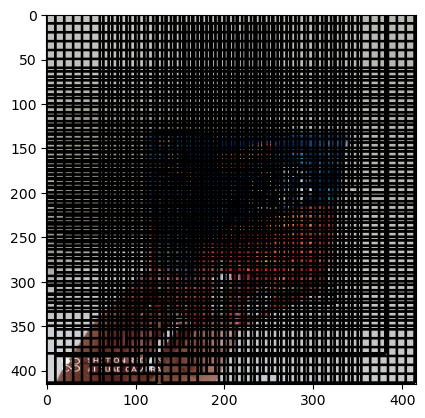

In [20]:
### Testing the classifier (SVM) ###

# Import the required modules
from skimage.transform import pyramid_gaussian
from skimage.io import imread
from skimage.feature import hog
import joblib
import cv2
import numpy as np
import matplotlib.pyplot as plt


def sliding_window(image, window_size, step_size):
    for y in range(0, image.shape[0], step_size):
        for x in range(0, image.shape[1], step_size):
            yield (x, y, image[y:y + window_size[1], x:x + window_size[0]])

def convert_to_gray(img):
    img = cv2.convertScaleAbs(img)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    return gray

if __name__ == "__main__":

    # Read the image
    im = cv2.imread("dataset/test/Cup-a-soup-tomato-006_jpg.rf.456ce6c639a2c20a27538dedecd8796d.jpg")
    height, width, channels =  im.shape
    print(f"Width: {width}, Height: {height}, Channels: {channels}")
    
    #fd = hog(im, orientations, pixels_per_cell, cells_per_block)
    #fd = np.array(fd).reshape(1, -1)  # Reshape to 2D array with one row
    #pred = clf.predict(fd)
    #if pred == 1:
    #    print ("found")
    #else:
    #    print("not found")
    
    min_wdw_sz = (64, 64)
    step_size = 10
    downscale = 1.25
    visualize_det = "store_true"
    orientations = 9
    pixels_per_cell = (8, 8)
    cells_per_block = (2, 2)

    # Load the classifier
    model_path = os.path.join("output/models", 'model.pkl')    
    clf = joblib.load(model_path)


    # List to store the detections
    detections = []
    # The current scale of the image
    scale = 0
    # Downscale the image and iterate
    for im_scaled in pyramid_gaussian(im, downscale=downscale):
        # This list contains detections at the current scale
        cd = []
        # If the width or height of the scaled image is less than
        # the width or height of the window, then end the iterations.
        if im_scaled.shape[0] < min_wdw_sz[1] or im_scaled.shape[1] < min_wdw_sz[0]:
            break
        for (x, y, im_window) in sliding_window(im_scaled, min_wdw_sz, step_size):
            if im_window.shape[0] != min_wdw_sz[1] or im_window.shape[1] != min_wdw_sz[0]:
                continue
            print("Image Size (scaled):", im_scaled.shape)
            print("Window Size:", im_window.shape)
            # Calculate the HOG features
            im_window = convert_to_gray(im_window)
            fd = hog(im_window, orientations, pixels_per_cell, cells_per_block)
            fd = np.array(fd).reshape(1, -1)  # Reshape to 2D array with one row
            pred = clf.predict(fd)
            if pred == 1:
                print ("Detection:: Location -> ({}, {})".format(x, y))
                print ("Scale ->  {} | Confidence Score {} \n".format(scale,clf.decision_function(fd)))
                detections.append((x, y, clf.decision_function(fd),
                    int(min_wdw_sz[0]*(downscale**scale)),
                    int(min_wdw_sz[1]*(downscale**scale))))
                cd.append(detections[-1])
        # Mo#ve the the next scale
        scale+=1
    # Display the results before performing NMS
    clone = im.copy()
    for (x_tl, y_tl, _, w, h) in detections:
        # Draw the detections
        cv2.rectangle(im, (x_tl, y_tl), (x_tl+w, y_tl+h), (0, 0, 0), thickness=2)
    plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB))
    plt.show()
    #cv2.imshow("Raw Detections before NMS", im)
    ## Perform Non Maxima Suppression
    #detections = nms(detections, threshold)

    ## Display the results after performing NMS
    #for (x_tl, y_tl, _, w, h) in detections:
    #    # Draw the detections
    #    cv2.rectangle(clone, (x_tl, y_tl), (x_tl+w,y_tl+h), (0, 0, 0), thickness=2)
    #cv2.imshow("Final Detections after applying NMS", clone)
    #cv2.waitKey()
